# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('C:/Users/Acer/Downloads/speaker+accent+recognition/accent-mfcc-data-1.csv')

In [3]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [4]:
#Checking missing values
df.isnull().sum()

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64

# Upsampling

Text(0, 0.5, 'Frequency')

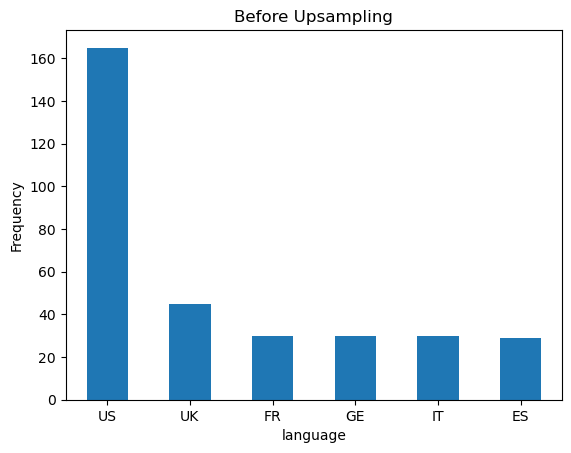

In [5]:
count_classes = pd.value_counts(df['language'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Before Upsampling")
plt.xticks()
plt.xlabel("language")
plt.ylabel("Frequency")

In [6]:
df['language'].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE
x = df.drop(['language'], axis=1)
y = df.language
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [8]:
x.shape, y.shape
smk = SMOTE(random_state=15)
x_res,y_res=smk.fit_resample(x, y)

In [9]:
x_res.shape, y_res.shape

((990, 12), (990,))

In [10]:
y_res.value_counts()

ES    165
FR    165
GE    165
IT    165
UK    165
US    165
Name: language, dtype: int64

Text(0, 0.5, 'Frequency')

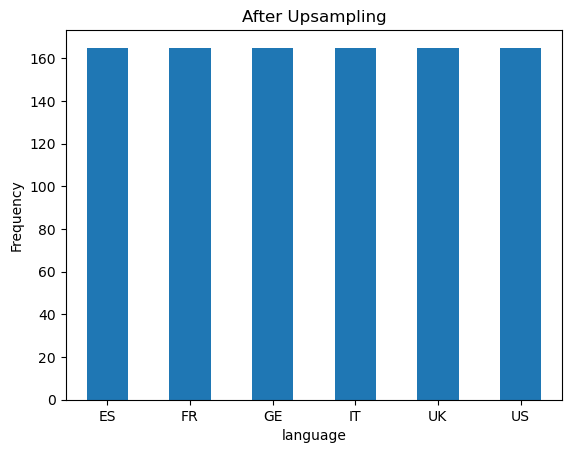

In [11]:
count_classes = pd.value_counts(y_res, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("After Upsampling")
plt.xticks()
plt.xlabel("language")
plt.ylabel("Frequency")

# Encoding and Scaling

In [12]:
y_res, label = pd.factorize(y_res)

In [13]:
print(label)

Index(['ES', 'FR', 'GE', 'IT', 'UK', 'US'], dtype='object')


In [14]:
y.head()

0    ES
1    ES
2    ES
3    ES
4    ES
Name: language, dtype: object

In [15]:
#Standarization
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])

In [18]:
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,0.279792,-0.638952,1.381754,0.917983,-0.437676,0.738790,-0.927986,-0.638837,0.741777,-0.089478,-0.450393,-0.423923
1,1.047121,-0.252673,0.362759,1.005957,-0.433478,0.642656,-1.059611,-0.614146,0.502814,-0.426374,-0.028414,-0.751824
2,0.428026,-0.343875,1.427337,0.461802,-0.332036,0.526385,-1.789739,-0.205266,-0.126230,-0.961741,-0.703298,-0.832757
3,0.215566,-0.404134,1.077601,0.418255,-0.278095,0.525133,-1.195939,0.397703,0.188654,-0.726397,-0.308730,-0.796966
4,0.037590,-0.300867,1.332568,0.382762,-0.245035,0.792172,-1.172020,-0.264864,0.392066,-0.254754,-0.080501,-0.951215


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=5)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(693, 12)
(297, 12)
(693,)
(297,)


# Implementing ML Algorithms

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_accuracy = knn.score(x_test, y_test)
knn_accuracy

0.9191919191919192

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
dt_accuracy=dt.score(x_test, y_test)
dt_accuracy

0.9023569023569024

In [23]:
from sklearn.svm import SVC
svc= SVC(random_state=5)
svc.fit(x_train,y_train)
svc_accuracy = svc.score(x_test, y_test)
svc_accuracy

0.8585858585858586

In [24]:
#Random Forest with best accuracy
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(random_state=5)
randf.fit(x_train,y_train)
pred_randf = randf.predict(x_test)
#pred_randf_with_categorical_value = le.inverse_transform(pred_randf)
#print(pred_randf_with_categorical_value)
randf_accuracy = randf.score(x_test, y_test)
randf_accuracy

0.9528619528619529

In [25]:
print(pred_randf.shape)

(297,)


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=5)
logreg.fit(x_train, y_train)
logreg_accuracy=logreg.score(x_test, y_test)
logreg_accuracy

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.835016835016835

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_accuracy=nb.score(x_test, y_test)
nb_accuracy

0.7609427609427609

# Saving above ML Models

In [28]:
import joblib as jb

In [29]:
#Saving models using Joblib
jb.dump(knn,'knn')
jb.dump(dt,'dt')
jb.dump(svc,'svc')
jb.dump(randf,'randf')
jb.dump(logreg,'logreg')
jb.dump(nb,'nb')

['nb']

In [30]:
#Loading those saved models
import joblib as jb
knn_default = jb.load('knn')
dt_default =  jb.load('dt')
svc_default = jb.load('svc')
randf_default =  jb.load('randf')
logreg_default =  jb.load('logreg')
nb_default =  jb.load('nb')

In [31]:
#Printing accuracy from the saved model files
print("KNN accuracy           : ", knn_default.score(x_test,y_test))
print("Decision Tree accuracy : ", dt_default.score(x_test,y_test))
print("Support Vector Machine : ", svc_default.score(x_test,y_test))
print("Random Forest accuracy : ", randf_default.score(x_test,y_test))
print("Logistic Regression    : ", logreg_default.score(x_test,y_test))
print("Naive Bayes accuracy   : ", nb_default.score(x_test,y_test))

KNN accuracy           :  0.9191919191919192
Decision Tree accuracy :  0.9023569023569024
Support Vector Machine :  0.8585858585858586
Random Forest accuracy :  0.9528619528619529
Logistic Regression    :  0.835016835016835
Naive Bayes accuracy   :  0.7609427609427609


# Model Performance Evaluation

### Accuracy Comparison of Algorithms

In [33]:
d = {'Algorithm': ['K Nearest Neighbors', 'Support Vector Machine','Decision Tree',
                   'Random Forest','Logistic Regression','Naive Bayes'],
     'Accuracy (in percent)': [91.91,85.85,90.23,95.28,83.50,76.09]}
df_accuracy = pd.DataFrame(data=d)
df_accuracy

,Algorithm,Accuracy (in percent)
0,K Nearest Neighbors,91.91
1,Support Vector Machine,85.85
2,Decision Tree,90.23
3,Random Forest,95.28
4,Logistic Regression,83.50
5,Naive Bayes,76.09


[Text(0, 0, '91.91'),
 Text(0, 0, '85.85'),
 Text(0, 0, '90.23'),
 Text(0, 0, '95.28'),
 Text(0, 0, '83.5'),
 Text(0, 0, '76.09')]

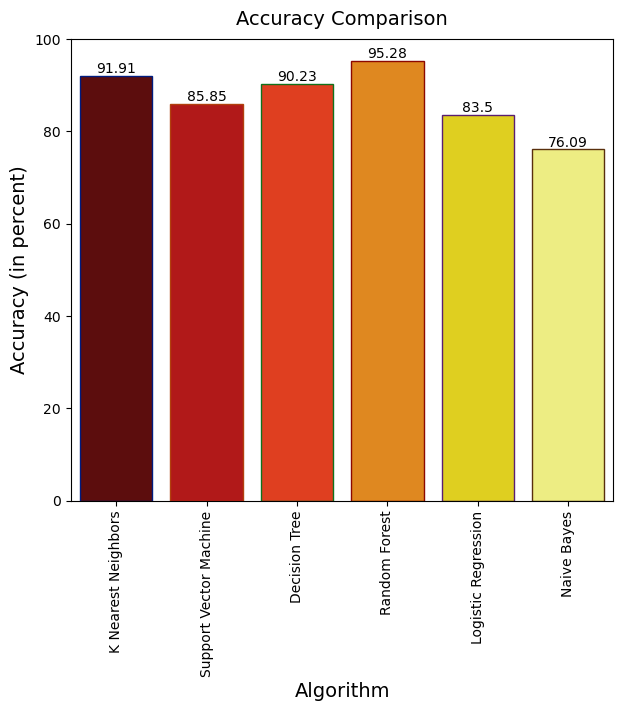

In [34]:
plt.figure(figsize=(7,6))
plt.title('Accuracy Comparison',fontsize=14, pad = 10.0)
p = sns.barplot(x="Algorithm", y="Accuracy (in percent)", data=df_accuracy,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
p.set_xlabel('Algorithm', fontsize=14)
p.set_ylabel('Accuracy (in percent)', fontsize=14)
p.bar_label(p.containers[0])
#plt.savefig('Accuracy Comparison', dpi=300);

### Confusion Matrix & ROC-AUC

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [36]:
cf_matrix = confusion_matrix(y_test,pred_randf)
cf_matrix

array([[53,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  0],
       [ 2,  0,  0,  0, 54,  3],
       [ 2,  0,  2,  2,  2, 36]], dtype=int64)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'ES'),
  Text(0, 1.5, 'FR'),
  Text(0, 2.5, 'GE'),
  Text(0, 3.5, 'IT'),
  Text(0, 4.5, 'UK'),
  Text(0, 5.5, 'US')])

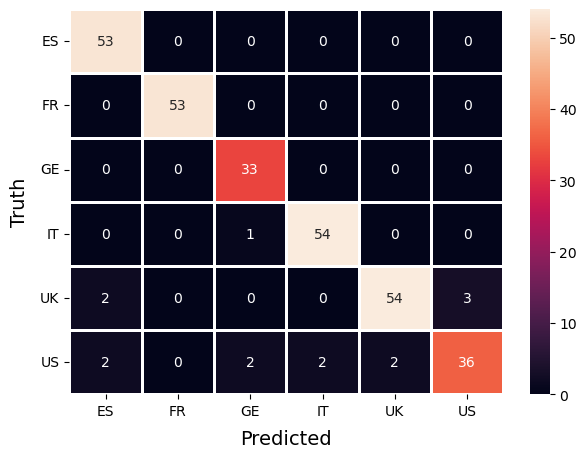

In [37]:
import seaborn as sns
cf_matrix = pd.crosstab(label[y_test],label[pred_randf])
fig = plt.subplots(figsize=(7,5))
s = sns.heatmap(cf_matrix, linewidths=1, annot=True)
s.set_xlabel('Predicted', labelpad=8.0, fontsize=14)
s.set_ylabel('Truth', labelpad=8.0, fontsize=14)
#plt.savefig('Confusion Matrix',dpi=300);
plt.yticks(rotation=0)

In [38]:
print(classification_report(y_test,pred_randf,target_names=label))

              precision    recall  f1-score   support

          ES       0.93      1.00      0.96        53
          FR       1.00      1.00      1.00        53
          GE       0.92      1.00      0.96        33
          IT       0.96      0.98      0.97        55
          UK       0.96      0.92      0.94        59
          US       0.92      0.82      0.87        44

    accuracy                           0.95       297
   macro avg       0.95      0.95      0.95       297
weighted avg       0.95      0.95      0.95       297



In [ ]:
clf = OneVsRestClassifier(randf)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

In [40]:
fpr = {}
tpr = {}
thresh ={}

n_class = 6
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

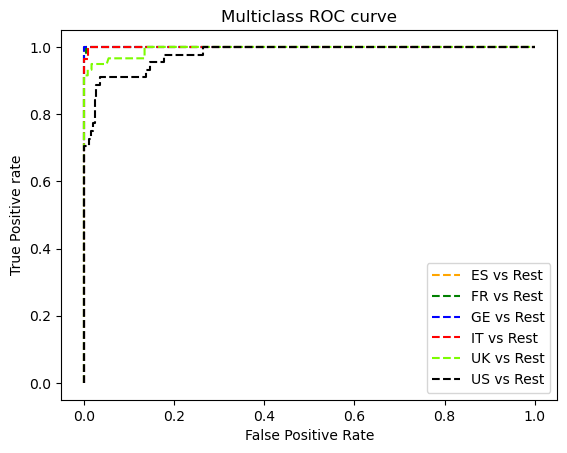

In [40]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ES vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='FR vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='GE vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='IT vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lawngreen', label='UK vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='US vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300);  